# BCG Inside Sherpa Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv('../Data/cleaned_data.csv')

df.drop(df.columns[0], inplace = True, axis = 1)

df.head(5)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0


## 1. Simplify Information

### Simplify Categorical Information

In [3]:
# Convert date information to date data type
# We repeat this process because after loading the data back from csv, the format for the date columns resets.

def convert_to_dates(df):
    col_to_convert = ['date_activ', 'date_modif_prod',
                      'price_date', 'date_end', 'date_renewal']
    
    for col in col_to_convert:
        df[col] = pd.to_datetime(df[col], format = '%Y-%m-%d')
        
convert_to_dates(df)

In [4]:
def simplify_cols(df):
    col_to_simplyfiy = list(df.dtypes[df.dtypes == object].index)
    
    for col in col_to_simplyfiy:
        df[col] = [x[0:4] for x in df[col]]
simplify_cols(df)

### Simplify Date Information

In [5]:
def simplify_date(df):
    cols = df.dtypes[df.dtypes == 'datetime64[ns]'].index
    
    for col in cols:
        df[col] = df[col].dt.year
        df[col].rename('month'+col)

simplify_date(df)

## 2. Identify and Change Outlier

In [6]:
numeric_features = list(df.drop('churn', axis = 1).dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index)

numeric_features = [x for x in numeric_features if x not in list(df.loc[:, df.columns.str.contains("date")].columns)]

categorical_features = list(df.drop(numeric_features, axis = 1).columns)
categorical_features.remove('id')

In [7]:
def deal_outlier(df):
    cols = df.drop('churn', axis = 1).dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64')].index

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        outlier_indicator = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        df.loc[outlier_indicator, col] = df.loc[~outlier_indicator, col].mean()
        
        if sum(outlier_indicator) != 0:
            print('Changed ' + str(sum(outlier_indicator)) + ' on ' + col)
deal_outlier(df)

Changed 30637 on cons_12m
Changed 35078 on cons_gas_12m
Changed 30086 on cons_last_month
Changed 6046 on date_activ
Changed 11920 on date_end
Changed 24 on date_modif_prod
Changed 16926 on date_renewal
Changed 42042 on forecast_base_bill_ele
Changed 42042 on forecast_base_bill_year
Changed 42042 on forecast_bill_12m
Changed 42042 on forecast_cons
Changed 16456 on forecast_cons_12m
Changed 19011 on forecast_cons_year
Changed 6944 on forecast_discount_energy
Changed 4590 on forecast_meter_rent_12m
Changed 5601 on forecast_price_energy_p1
Changed 10188 on forecast_price_pow_p1
Changed 18037 on imp_cons
Changed 8828 on margin_gross_pow_ele
Changed 8577 on margin_net_pow_ele
Changed 42391 on nb_prod_act
Changed 14245 on net_margin
Changed 5890 on num_years_antig
Changed 24072 on pow_max
Changed 5633 on price_p1_var
Changed 10452 on price_p1_fix


## 3. Removing Multicolinearity Data

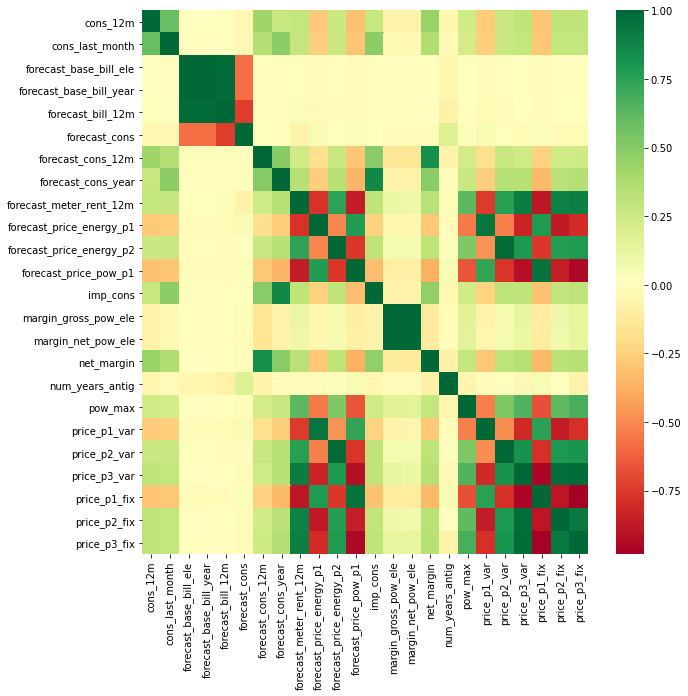

In [8]:
corr_matrix = df[numeric_features].drop(['cons_gas_12m', 'forecast_discount_energy',
                                        'nb_prod_act'], axis = 1).corr()


plt.figure(figsize=(10,10))
g = sns.heatmap(corr_matrix,annot=False,cmap="RdYlGn")

In [9]:
df.drop(['forecast_base_bill_year', 'forecast_bill_12m', 'margin_gross_pow_ele'], axis = 1, inplace = True)

In [10]:
# Update Features Information
numeric_features = list(df.drop('churn', axis = 1).dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index)

numeric_features = [x for x in numeric_features if x not in list(df.loc[:, df.columns.str.contains("date")].columns)]

categorical_features = list(df.drop('churn', axis = 1).drop(numeric_features, axis = 1).columns)
categorical_features.remove('id')

## 4. Transform Skewed Information

In [11]:
def transform_skew(df, thres = 1):
    skewed_features = df[numeric_features].skew()[abs(df[numeric_features].skew()) > thres].index
    
    for feat in skewed_features:
        df[feat] = np.log10(df[feat] + 1)
    
    for changed in skewed_features:
        print('changed ' + changed)
    
transform_skew(df)

changed cons_12m
changed cons_last_month
changed forecast_cons_12m
changed forecast_cons_year
changed imp_cons
changed net_margin
changed pow_max


## 5. Encoding Categorical Variables

In [12]:
def make_pareto(df, cols, cutoff = 100):
    
    for col in cols:
        temp_df = df[col].copy()
        temp_df = pd.DataFrame(temp_df.value_counts().sort_values(ascending = False))

        temp_df["cumpercentage"] = temp_df[col].cumsum()/temp_df[col].sum()*100

        if len(temp_df) > 10:
            temp_df = temp_df[temp_df['cumpercentage'] < cutoff]

        fig, ax = plt.subplots()
        
        ax.bar(temp_df.index, temp_df[col], color="C0")
        ax2 = ax.twinx()
        ax2.plot(temp_df.index, temp_df["cumpercentage"], color="C1", marker="D", ms=7)
        ax2.yaxis.set_major_formatter(PercentFormatter())

        ax.tick_params(axis="y", colors="C0")
        ax2.tick_params(axis="y", colors="C1")
        
        plt.title('Pareto chart of ' + col)
        
        plt.show()

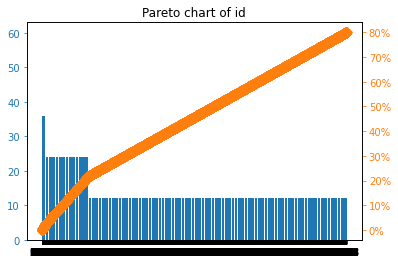

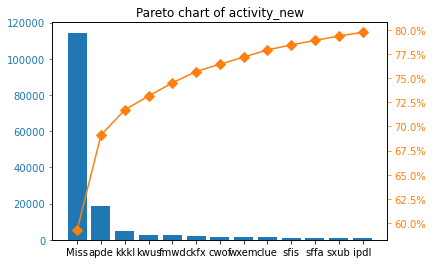

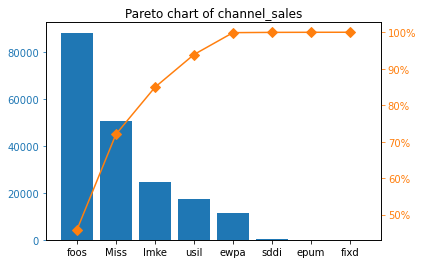

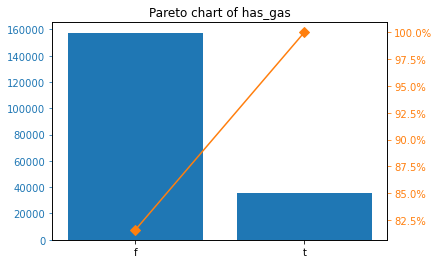

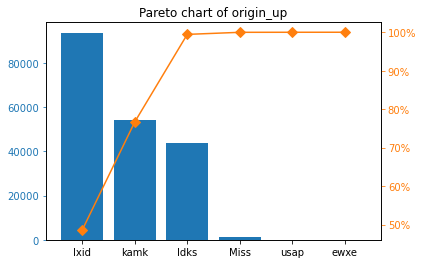

In [13]:
cols_ = ['id', 'activity_new', 'channel_sales', 'has_gas', 'origin_up']

make_pareto(df, cols = cols_, cutoff = 80)

Based on the graph above, we can see that **channel sales**, **origin up**, and **activity new** could be kept for further analysis because it showed that most of the information followed the 80-20 rules (80% of the information is explained by the 20%). Also, since **Id** features are highly diverse, we can remove that information from our modelling process. **Has gas** feature can also be kept because it is a binary, and could be easily encoded.

In [14]:
df_with_dummies = pd.get_dummies(df, columns = categorical_features)
df_with_dummies.drop('id', inplace = True, axis = 1)

In [19]:
df_with_dummies

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,date_renewal_2015.0,has_gas_f,has_gas_t,origin_up_Miss,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap,price_date_2015.0
0,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
1,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
2,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
3,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
4,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,3.941064,0.0,0.000000,335.807483,206.800605,2.882758,0.000000,0.0,1.070000,0.167086,...,1,1,0,0,0,0,1,0,0,1
192998,3.941064,0.0,0.000000,335.807483,206.800605,2.882758,0.000000,0.0,1.070000,0.167086,...,1,1,0,0,0,0,1,0,0,1
192999,3.941064,0.0,0.000000,335.807483,206.800605,2.882758,0.000000,0.0,1.070000,0.167086,...,1,1,0,0,0,0,1,0,0,1
193000,3.941064,0.0,0.000000,335.807483,206.800605,2.882758,0.000000,0.0,1.070000,0.167086,...,1,1,0,0,0,0,1,0,0,1


In [16]:
df_with_dummies.to_csv('../Data/data_ready.csv')